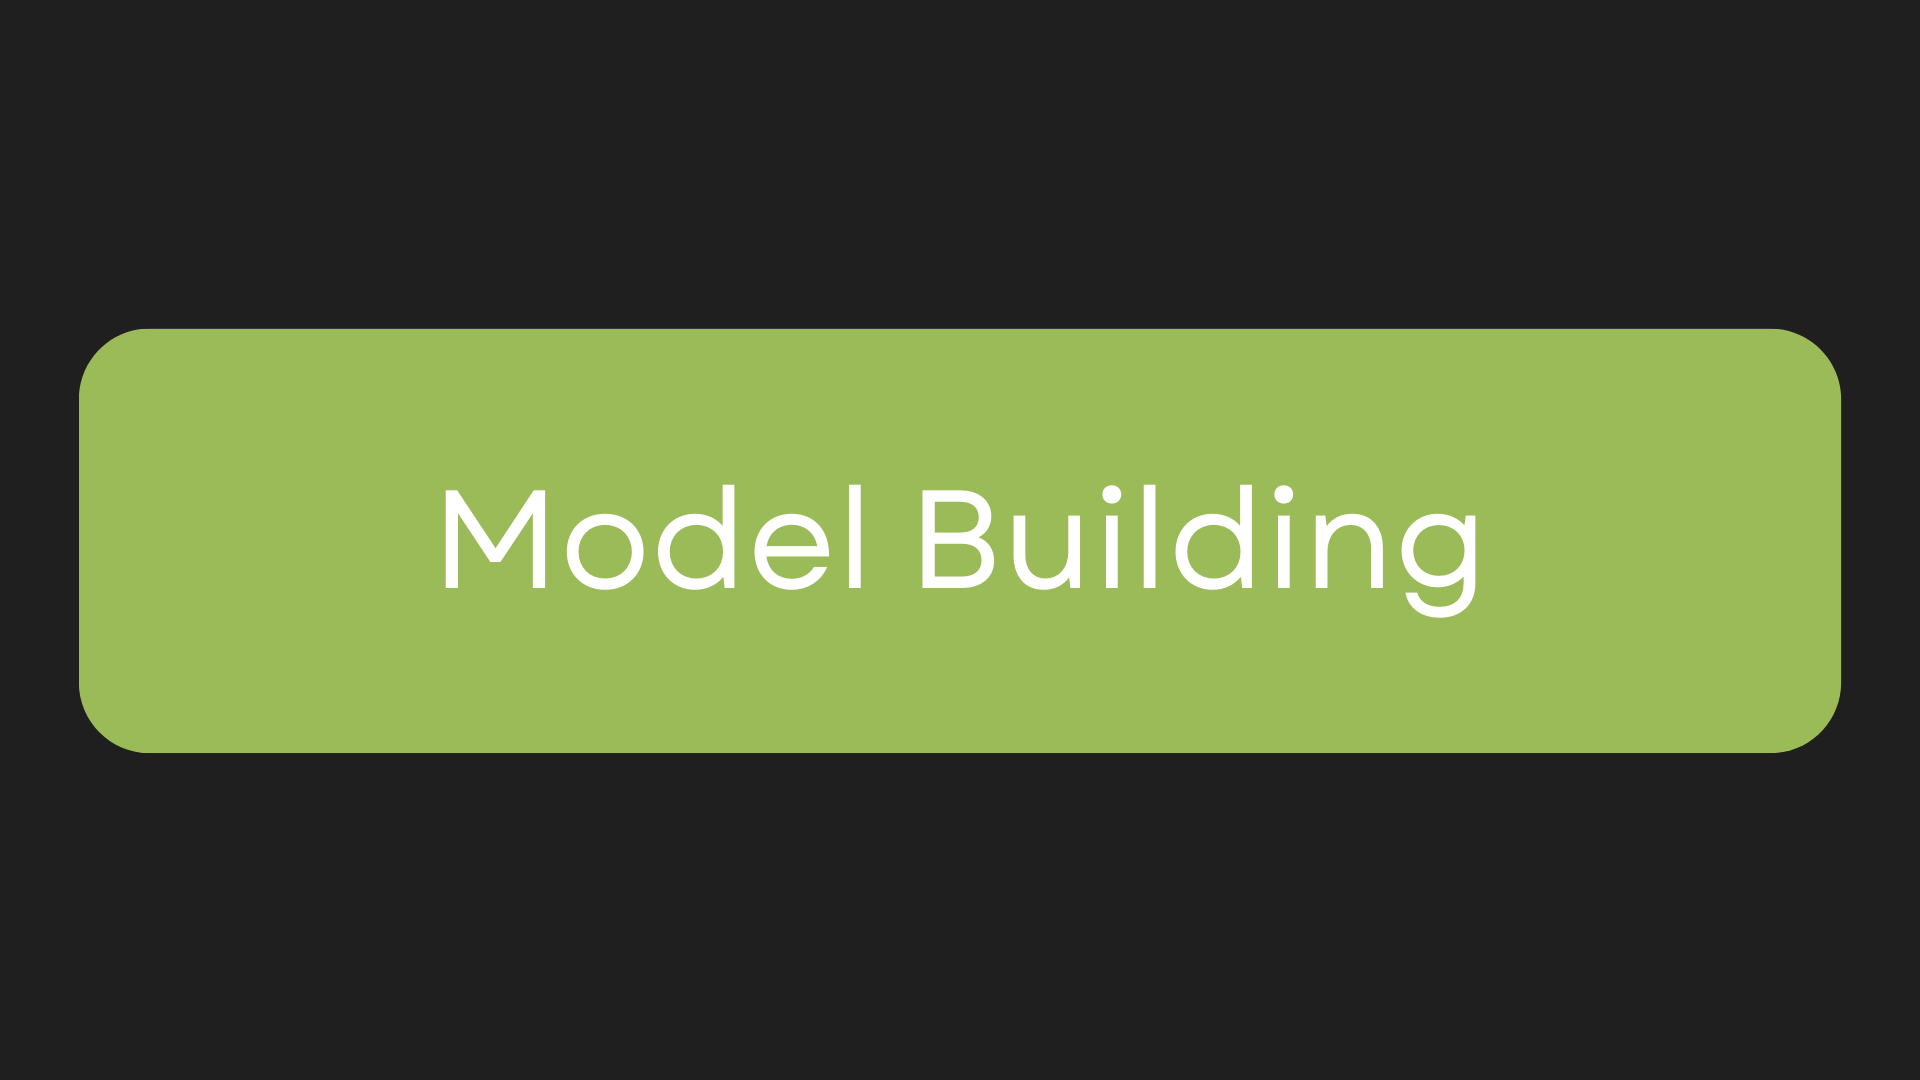



⌛ Let's create the CNN encoder. You should include:

1. Using the `torchvision.models`'s `resnet50` which is a well established model. Set the  `weights` parameter to the default ones using this line: `models.ResNet50_Weights.DEFAULT`. Set this to `resnet`

2. Remove the last layer of the `resnet` model using these lines:

`modules = list(resnet.children())[:-1]`

`self.resnet = nn.Sequential(*modules)`

`for param in self.resnet.parameters():`

            `param.requires_grad = False`

3. Add our own FC layer by setting `self.fc` to a new Linear layer using the `nn` module. The linear method should contain: `resnet.fc.in_features, embed_size`

4. Add dropout and flatten layers using the `nn` module

5. Execute forward pass through all your layers (resnet, flatten, fc, dropout)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchinfo import summary

class CNN_Encoder(nn.Module): 
    def __init__(self, embed_size):
        super().__init__()

        #CODE HERE


    def forward(self, images):
        
        #CODE HERE



⌛ Let's create the LSTM decoder. You should have:

1. Four layers from the `nn` module with correct parameters
    - An embedding layer
    - An LSTM layer
    - A linear layer
    - A dropout layer
2. Forward pass
    - Embed the captions using your dropout layer on the `captions` parameter
    - Append the encoder features
    - Pass the embeddings back through the LSTM
    - Get predictions (`outputs` variable) for each word using the FC layer and return the `outputs` and `states`

In [ ]:
class LSTM_Decoder(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super().__init__()

        #CODE HERE

    def forward(self, encoder_features, captions, states=None):

        #CODE HERE
        
        return outputs, states


⌛ Let's create the CNN to LSTM.

In `__init__`:

1. Define the encoders and decoders with your previous functions above (`CNN_Encoder()` and `LSTM_Decoder()`) as `self.encoder` or `self.decoder`

In `forward`:

1. Encode the images and set it to `encoder_features`
2. Get outputs with the decoder and set it to `outputs`

In `caption_image`:

1. Set `torch.no_grad():` 
2. Encode the `image` (from the `caption_image` parameters). Set it to `encoder_features`
3. Start with the SOS (Start of sentence) token. Find it in our vocabulary using: `word_idx = vocabulary.word_to_index["< SOS >"]` and append it to our results
4. Embed our SOS token
5. Use the encoding features with the SOS token
6. Start prediciting every subsequent word until you hit an EOS token or reach max length
7. Convert indicies back to words and remove any special tokens. Return the output




In [ ]:
class CNN_to_LSTM(nn.Module):
    def __init__(self, embed_size, hidden_size, num_layers, vocab_size):
        super().__init__()

        #CODE HERE

    def forward(self, images, captions):
        
        #CODE HERE
        
        return outputs
    
    def caption_image(self, image, vocabulary, max_length=30):
        """
        Generate a caption for an image using the trained model
        """
        result = []
        
        #CODE HERE

        special_tokens = ["<PAD>", "<UNK>", "< SOS >", "<EOS>"]
        return [vocabulary.index_to_word[idx] for idx in result 
                if vocabulary.index_to_word[idx] not in special_tokens]

Strength test below to test our model

In [ ]:
def strength_test():
    # Create tensors that match the dimensions from your dataset
    image_tensor = torch.randn([32, 3, 224, 224])  # 32 images from batch
    captions = torch.randint(0, 10000, (20, 32))   # 20 words for 32 captions

    # Initialize model with smaller dimensions for quicker testing
    model = CNN_to_LSTM(embed_size=256, hidden_size=256, num_layers=1, vocab_size=10000)

    summary(model, input_data=[image_tensor, captions])

    # Forward pass
    output = model(image_tensor, captions)
    
    # Print output shape
    print("Output tensor shape:", output.shape)
    print("Test completed successfully!")

if __name__ == "__main__":
    strength_test()
    